In [11]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as sts
import seaborn as sns
import datetime
%matplotlib inline

Границы Нью-Йорка.

In [12]:
nyc_longitude_west = -74.25559
nyc_longitude_east = -73.70001
nyc_latitude_north = 40.91553
nyc_latitude_south = 40.49612

Загружаем необходимые данные.

In [13]:
data = pd.read_csv("./data/2014/yellow_tripdata_2014-03.csv",
                   parse_dates=['pickup_datetime', 'dropoff_datetime'], 
                   date_parser= pd.tseries.tools.to_datetime,#pd.datetools.to_datetime,
                   usecols=['pickup_datetime', 'dropoff_datetime',
                            'passenger_count', 'trip_distance', 
                            'pickup_longitude', 'pickup_latitude'], skipinitialspace=True)
data.head()

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude
0,2014-03-01 01:07:38,2014-03-01 01:16:26,1,2.0,-73.951504,40.714113
1,2014-03-01 01:08:03,2014-03-01 01:12:51,2,1.2,-74.004735,40.742173
2,2014-03-01 01:08:51,2014-03-01 01:13:18,3,0.5,-73.949302,40.707569
3,2014-03-01 01:09:20,2014-03-01 01:24:18,3,3.5,-73.993539,40.721300
4,2014-03-01 01:09:46,2014-03-01 01:22:34,1,1.8,-73.987881,40.744579


In [ ]:
np.unique(np.sort(data.pickup_datetime.values))

In [ ]:
data = pd.read_csv("./data/2016/yellow_tripdata_2016-05.csv", 
                   parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime'], 
                   date_parser= pd.tseries.tools.to_datetime,#pd.datetools.to_datetime,
                   usecols=['tpep_pickup_datetime', 'tpep_dropoff_datetime',
                            'passenger_count', 'trip_distance', 
                            'pickup_longitude', 'pickup_latitude'])
data.head(10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11836853 entries, 0 to 11836852
Data columns (total 6 columns):
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count          int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
dtypes: datetime64[ns](2), float64(3), int64(1)
memory usage: 541.8 MB


Удаляем маршруты с нулевой длительностью, нулевым количеством пассажиров, нулевым расстоянием по счетчику и те маршруты, которые начинаются не внутри Нью Йорка.

In [6]:
data = data[((data.tpep_dropoff_datetime - data.tpep_pickup_datetime) > datetime.timedelta(0)) &
            (data.passenger_count > 0) & (data.trip_distance > 0) &
            (data.pickup_latitude < nyc_latitude_north) & (data.pickup_latitude > nyc_latitude_south) &
            (data.pickup_longitude < nyc_longitude_east) & (data.pickup_longitude > nyc_longitude_west)]

In [14]:
data = data[((data.dropoff_datetime - data.pickup_datetime) > datetime.timedelta(0)) &
            (data.passenger_count > 0) & (data.trip_distance > 0) &
            (data.pickup_latitude < nyc_latitude_north) & (data.pickup_latitude > nyc_latitude_south) &
            (data.pickup_longitude < nyc_longitude_east) & (data.pickup_longitude > nyc_longitude_west)]

In [31]:
data.head(10)

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude
0,2014-03-01 01:07:38,2014-03-01 01:16:26,1,2.0,-73.951504,40.714113
1,2014-03-01 01:08:03,2014-03-01 01:12:51,2,1.2,-74.004735,40.742173
2,2014-03-01 01:08:51,2014-03-01 01:13:18,3,0.5,-73.949302,40.707569
3,2014-03-01 01:09:20,2014-03-01 01:24:18,3,3.5,-73.993539,40.721300
4,2014-03-01 01:09:46,2014-03-01 01:22:34,1,1.8,-73.987881,40.744579
5,2014-03-01 01:12:41,2014-03-01 01:15:38,1,0.5,-74.002110,40.724484
6,2014-03-01 01:12:11,2014-03-01 01:27:38,2,3.7,-73.971921,40.762606
7,2014-03-01 01:13:55,2014-03-01 01:34:54,1,5.4,-73.991226,40.749797
8,2014-03-01 01:14:06,2014-03-01 01:28:25,1,3.5,-73.995061,40.720683
9,2014-03-01 01:13:10,2014-03-01 01:38:54,3,5.9,-73.975166,40.782357


Удаляем ненужные далее столбцы.

In [13]:
data.drop(['tpep_dropoff_datetime', 'passenger_count', 'trip_distance'], axis = 1, inplace=True)

In [7]:
data.drop(['tpep_dropoff_datetime'], axis = 1, inplace=True)

In [32]:
data.drop(['dropoff_datetime', 'passenger_count', 'trip_distance'], axis = 1, inplace=True)

In [15]:
data.drop(['dropoff_datetime'], axis = 1, inplace=True)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15096239 entries, 0 to 15428126
Data columns (total 3 columns):
pickup_datetime     datetime64[ns]
pickup_longitude    float64
pickup_latitude     float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 460.7 MB


Оставляем от времени поездки только часы.

In [8]:
data['tpep_pickup_datetime'] = data['tpep_pickup_datetime'].apply(lambda dt: dt.replace(minute=0, second=0, microsecond=0))
data.head(10)

,tpep_pickup_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude
0,2016-05-01,1,3.60,-73.985901,40.768040
1,2016-05-01,1,1.68,-73.991577,40.744751
2,2016-05-01,6,1.09,-73.993073,40.741573
3,2016-05-01,1,4.21,-73.991943,40.684601
4,2016-05-01,1,0.56,-74.005280,40.740192
5,2016-05-01,2,0.63,-73.979294,40.755764
6,2016-05-01,1,6.68,-73.981544,40.780739
7,2016-05-01,1,1.48,-73.987198,40.750507
11,2016-05-01,1,5.20,-73.951302,40.774345
12,2016-05-01,5,4.75,-73.983498,40.726082


In [16]:
data['pickup_datetime'] = data['pickup_datetime'].apply(lambda dt: dt.replace(minute=0, second=0, microsecond=0))
data.head(10)

,pickup_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude
0,2014-03-01 01:00:00,1,2.0,-73.951504,40.714113
1,2014-03-01 01:00:00,2,1.2,-74.004735,40.742173
2,2014-03-01 01:00:00,3,0.5,-73.949302,40.707569
3,2014-03-01 01:00:00,3,3.5,-73.993539,40.721300
4,2014-03-01 01:00:00,1,1.8,-73.987881,40.744579
5,2014-03-01 01:00:00,1,0.5,-74.002110,40.724484
6,2014-03-01 01:00:00,2,3.7,-73.971921,40.762606
7,2014-03-01 01:00:00,1,5.4,-73.991226,40.749797
8,2014-03-01 01:00:00,1,3.5,-73.995061,40.720683
9,2014-03-01 01:00:00,3,5.9,-73.975166,40.782357


Выводим регионы, вводим функции для нахождения региона по долготе и широте. Первая функция использовалась для проверки последующих.

In [17]:
regions = pd.read_csv("regions.csv", delimiter=';')
regions.head()

,region,west,east,south,north
0,1,-74.25559,-74.244478,40.496120,40.504508
1,2,-74.25559,-74.244478,40.504508,40.512896
2,3,-74.25559,-74.244478,40.512896,40.521285
3,4,-74.25559,-74.244478,40.521285,40.529673
4,5,-74.25559,-74.244478,40.529673,40.538061


In [18]:
def check_longit_latit(regions, data):
    print data
    return ((regions.west <= data.pickup_longitude) & 
            (regions.east > data.pickup_longitude) &
            (regions.south <= data.pickup_latitude) &
            (regions.north > data.pickup_latitude))
regions[check_longit_latit(regions, data.ix[0])].region.values[0]

pickup_datetime     2014-03-01 01:00:00
passenger_count                       1
trip_distance                         2
pickup_longitude               -73.9515
pickup_latitude                 40.7141
Name: 0, dtype: object


1376

In [19]:
def long_reg(val):
    return np.ceil((val - nyc_longitude_west)*50.0/(nyc_longitude_east - nyc_longitude_west))
def lat_reg(val):
    return np.ceil((val - nyc_latitude_south)*50.0/(nyc_latitude_north - nyc_latitude_south))
def find_reg(longitude, latitude):
    return (long_reg(longitude) - 1)*50.0 + lat_reg(latitude)
find_reg(data.ix[0].pickup_longitude, data.ix[0].pickup_latitude)

1376.0

Далее применияем функции long_reg, lat_reg для нахождения региона по долготе и широте.

In [20]:
data.pickup_longitude = data.pickup_longitude.apply(long_reg)
data.pickup_latitude = data.pickup_latitude.apply(lat_reg)
data.head()

,pickup_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude
0,2014-03-01 01:00:00,1,2.0,28.0,26.0
1,2014-03-01 01:00:00,2,1.2,23.0,30.0
2,2014-03-01 01:00:00,3,0.5,28.0,26.0
3,2014-03-01 01:00:00,3,3.5,24.0,27.0
4,2014-03-01 01:00:00,1,1.8,25.0,30.0


Находим регион.

In [21]:
data['region'] = (data.pickup_longitude - 1)*50.0 + data.pickup_latitude
data.head()

,pickup_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,region
0,2014-03-01 01:00:00,1,2.0,28.0,26.0,1376.0
1,2014-03-01 01:00:00,2,1.2,23.0,30.0,1130.0
2,2014-03-01 01:00:00,3,0.5,28.0,26.0,1376.0
3,2014-03-01 01:00:00,3,3.5,24.0,27.0,1177.0
4,2014-03-01 01:00:00,1,1.8,25.0,30.0,1230.0


Аггрегируем данные по часам и регионам.

In [14]:
data['timestamp'] = data.tpep_pickup_datetime.apply(lambda x: x.value)
data.head()

,tpep_pickup_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,region,timestamp
0,2016-05-01,1,3.60,25.0,33.0,1233.0,1462060800000000000
1,2016-05-01,1,1.68,24.0,30.0,1180.0,1462060800000000000
2,2016-05-01,6,1.09,24.0,30.0,1180.0,1462060800000000000
3,2016-05-01,1,4.21,24.0,23.0,1173.0,1462060800000000000
4,2016-05-01,1,0.56,23.0,30.0,1130.0,1462060800000000000


In [22]:
data['timestamp'] = data.pickup_datetime.apply(lambda x: x.value)
data.head()

,pickup_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,region,timestamp
0,2014-03-01 01:00:00,1,2.0,28.0,26.0,1376.0,1393635600000000000
1,2014-03-01 01:00:00,2,1.2,23.0,30.0,1130.0,1393635600000000000
2,2014-03-01 01:00:00,3,0.5,28.0,26.0,1376.0,1393635600000000000
3,2014-03-01 01:00:00,3,3.5,24.0,27.0,1177.0,1393635600000000000
4,2014-03-01 01:00:00,1,1.8,25.0,30.0,1230.0,1393635600000000000


In [49]:
np.unique(data.pickup_datetime.values)

array(['2014-03-01T00:00:00.000000000', '2014-03-01T01:00:00.000000000',
       '2014-03-01T02:00:00.000000000', '2014-03-01T03:00:00.000000000',
       '2014-03-01T04:00:00.000000000', '2014-03-01T05:00:00.000000000',
       '2014-03-01T06:00:00.000000000', '2014-03-01T07:00:00.000000000',
       '2014-03-01T08:00:00.000000000', '2014-03-01T09:00:00.000000000',
       '2014-03-01T10:00:00.000000000', '2014-03-01T11:00:00.000000000',
       '2014-03-01T12:00:00.000000000', '2014-03-01T13:00:00.000000000',
       '2014-03-01T14:00:00.000000000', '2014-03-01T15:00:00.000000000',
       '2014-03-01T16:00:00.000000000', '2014-03-01T17:00:00.000000000',
       '2014-03-01T18:00:00.000000000', '2014-03-01T19:00:00.000000000',
       '2014-03-01T20:00:00.000000000', '2014-03-01T21:00:00.000000000',
       '2014-03-01T22:00:00.000000000', '2014-03-01T23:00:00.000000000',
       '2014-03-02T00:00:00.000000000', '2014-03-02T01:00:00.000000000',
       '2014-03-02T02:00:00.000000000', '2014-03-02

In [23]:
times = np.sort(data.timestamp.unique())
times = np.hstack((times, times[-1]+14620608000))

In [26]:
times = np.hstack((times[0]-3600000000000,times))

In [17]:
times.shape

(746L,)

In [46]:
agg_data = sts.binned_statistic_2d(data.region, data.timestamp, None, 'count', 
                                   bins=[np.arange(1, 2502), times])

In [27]:
agg_data1 = sts.binned_statistic_2d(data.region, data.timestamp, data.passenger_count, 'sum', 
                                   bins=[np.arange(1, 2502), times])

In [28]:
agg_data1.statistic.shape

(2500L, 744L)

In [36]:
np.unique(agg_data.statistic.ravel(), return_counts=True)

(array([  0.00000000e+00,   1.00000000e+00,   2.00000000e+00, ...,
          2.07800000e+03,   2.14500000e+03,   2.20600000e+03]),
 array([1720738,   39318,   15074, ...,       1,       1,       1], dtype=int64))

Выведем первые строчки полученной таблицы.

В моем случае строки - это регионы. А в первых регионах не было поездок.

In [28]:
np.unique(agg_data.statistic[:10,:])

array([ 0.])

Выведем данные по всем регионам за первый день мая 2016 года.

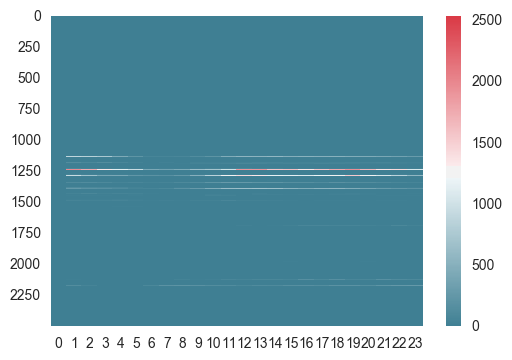

In [64]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(agg_data1.statistic[:,:24], cmap=cmap, yticklabels=250)

Выведем некоторые другие строчки таблицы.

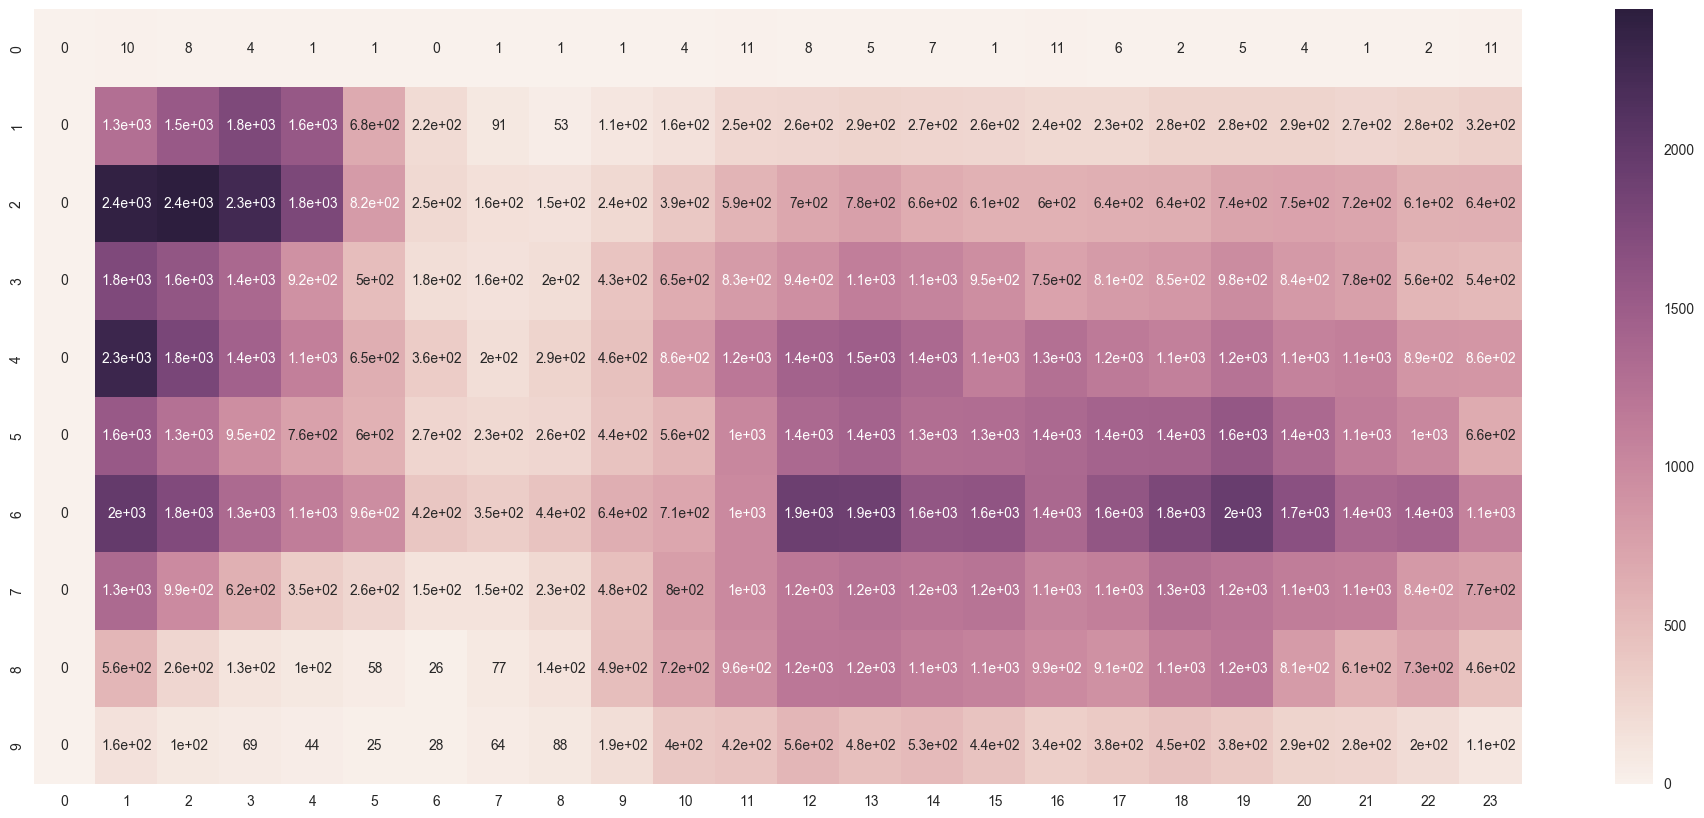

In [65]:
plt.figure(figsize=(24,10))
sns.heatmap(agg_data1.statistic[1225:1235,:24], annot=True)

Видим, что есть регионы в которых преобладают поездки в данный день, а есть регионы, из которых вообще не было поездок

Посмотрим на все строчки.

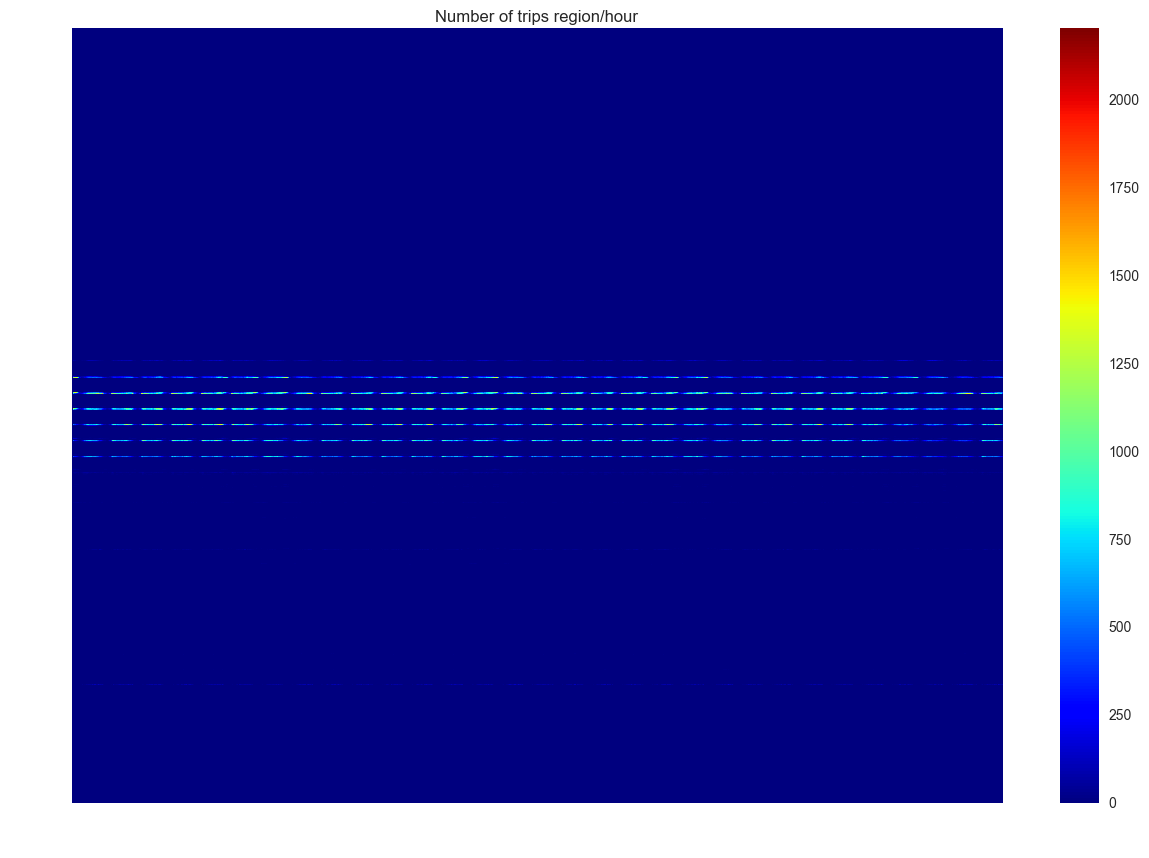

In [31]:
plt.figure(figsize=(15,10))
img = plt.imshow(agg_data.statistic, interpolation='nearest')
img.set_cmap('jet')
plt.title("Number of trips region/hour")
plt.axis('off')
plt.ylabel("Region")
plt.xlabel("Hour")
plt.axes().set_aspect('auto')
plt.colorbar()

Выделяются 10 регионов, из которых совершалось существенное число поездок. В тоже время имеется большое количество регионов откуда не совершалось поездок.

Данные о расположении Эмпаир Стэйт Билдинг были взяты отсюда: http://www.latlong.net/place/empire-state-building-new-york-ny-usa-5312.html Находим регион, к которому он относится.

In [66]:
empire_latitude = 40.748817
empire_longitude = -73.985428
empire_region = int(find_reg(empire_longitude, empire_latitude))
empire_region

1231

Выводим график поездок.

In [67]:
agg_data.statistic.shape

(2500L, 745L)

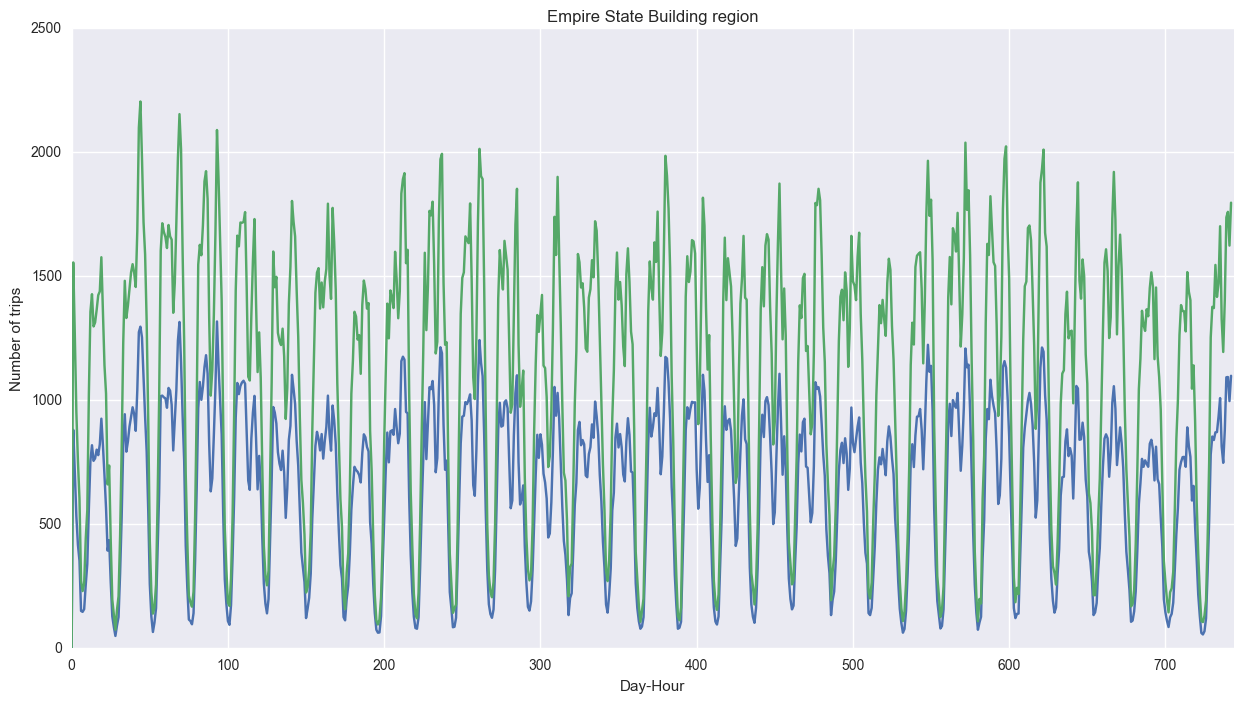

In [69]:
plt.figure(figsize=(15,8))
plt.plot(np.arange(743), agg_data.statistic[empire_region-1,:743])
plt.plot(np.arange(743), agg_data1.statistic[empire_region-1,:743])
plt.xlim([0,744])
plt.ylabel("Number of trips")
plt.xlabel("Day-Hour")
plt.title("Empire State Building region");

Число ячеек, из которых не было совершено ни одной поездки.

In [49]:
np.unique(agg_data.statistic.ravel(), return_counts=True)[1][0]

1720738

Таким образом, получили, что из 1718238 ячейки (день-час, регион) не было поездок в мае 2016.

Сохраняем полученные данные в файл

In [2]:
import pickle

In [30]:
with open('./data/2014/p_c_03.pkl', 'wb') as fid:
    pickle.dump(agg_data1.statistic, fid)

In [65]:
with open('./data/2014/03.pkl', 'wb') as fid:
    pickle.dump(agg_data.statistic, fid)

In [5]:
with open('./data/2016/p_c_06.pkl', 'rb') as fid:
    sts = pickle.load(fid)

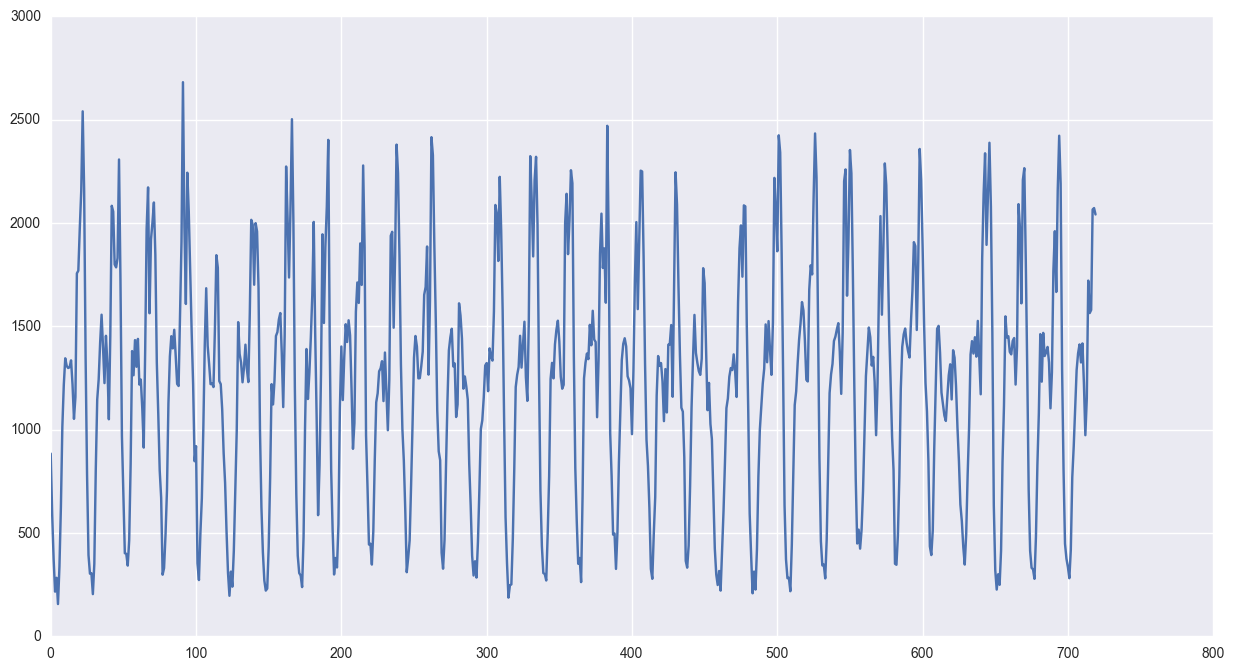

In [10]:
plt.figure(figsize=(15,8))
plt.plot(sts[1231,:743])